<a href="https://colab.research.google.com/github/alteregoxiv/stockpred/blob/main/stockpredictionlstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STOCK PREDICTION USING LSTM(KERAS)**


# **Importing necessary Libraries**

In [301]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Training Data Set**

In [302]:
traindata = pd.read_csv("./AMZNtrain.csv")
traindata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


# **Testing Data Set**

In [303]:
testdata = pd.read_csv("./AMZNtest.csv")
testdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
1,2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2,2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
3,2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200
4,2019-01-08,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400


# **Shapes of both data sets(Train , Test)**

In [304]:
traindata.shape , testdata.shape

((1258, 7), (21, 7))

# **Concatenating Datasers and Sorting**

In [305]:
data = pd.concat([traindata , testdata] , axis=0 , ignore_index=True)
data.head

<bound method NDFrame.head of             Date         Open         High  ...        Close    Adj Close    Volume
0     2014-01-02   398.799988   399.359985  ...   397.970001   397.970001   2137800
1     2014-01-03   398.290009   402.709991  ...   396.440002   396.440002   2210200
2     2014-01-06   395.850006   397.000000  ...   393.630005   393.630005   3170600
3     2014-01-07   395.040009   398.470001  ...   398.029999   398.029999   1916000
4     2014-01-08   398.470001   403.000000  ...   401.920013   401.920013   2316500
...          ...          ...          ...  ...          ...          ...       ...
1274  2019-01-25  1670.500000  1683.479980  ...  1670.569946  1670.569946   4945900
1275  2019-01-28  1643.589966  1645.000000  ...  1637.890015  1637.890015   4837700
1276  2019-01-29  1631.270020  1632.380005  ...  1593.880005  1593.880005   4632800
1277  2019-01-30  1623.000000  1676.949951  ...  1670.430054  1670.430054   5783800
1278  2019-01-31  1692.849976  1736.410034  ..

In [306]:
# for i in range(len(data)):
#   date = data["Date"][i]
#   d = date.split("-")
#   s = str(d[0]) + str(d[1]) + str(d[2])
#   data["Date"][i] = s
# data.head()

In [307]:
data = data.sort_index(ascending=True , axis=0)
data.head

<bound method NDFrame.head of             Date         Open         High  ...        Close    Adj Close    Volume
0     2014-01-02   398.799988   399.359985  ...   397.970001   397.970001   2137800
1     2014-01-03   398.290009   402.709991  ...   396.440002   396.440002   2210200
2     2014-01-06   395.850006   397.000000  ...   393.630005   393.630005   3170600
3     2014-01-07   395.040009   398.470001  ...   398.029999   398.029999   1916000
4     2014-01-08   398.470001   403.000000  ...   401.920013   401.920013   2316500
...          ...          ...          ...  ...          ...          ...       ...
1274  2019-01-25  1670.500000  1683.479980  ...  1670.569946  1670.569946   4945900
1275  2019-01-28  1643.589966  1645.000000  ...  1637.890015  1637.890015   4837700
1276  2019-01-29  1631.270020  1632.380005  ...  1593.880005  1593.880005   4632800
1277  2019-01-30  1623.000000  1676.949951  ...  1670.430054  1670.430054   5783800
1278  2019-01-31  1692.849976  1736.410034  ..

# **Saving the DataFrame**

In [308]:
data.to_csv(r'./AMZNTotalData.csv' , index=False)

In [309]:
newdata = pd.read_csv("./AMZNTotalData.csv")
newdata.head

<bound method NDFrame.head of             Date         Open         High  ...        Close    Adj Close    Volume
0     2014-01-02   398.799988   399.359985  ...   397.970001   397.970001   2137800
1     2014-01-03   398.290009   402.709991  ...   396.440002   396.440002   2210200
2     2014-01-06   395.850006   397.000000  ...   393.630005   393.630005   3170600
3     2014-01-07   395.040009   398.470001  ...   398.029999   398.029999   1916000
4     2014-01-08   398.470001   403.000000  ...   401.920013   401.920013   2316500
...          ...          ...          ...  ...          ...          ...       ...
1274  2019-01-25  1670.500000  1683.479980  ...  1670.569946  1670.569946   4945900
1275  2019-01-28  1643.589966  1645.000000  ...  1637.890015  1637.890015   4837700
1276  2019-01-29  1631.270020  1632.380005  ...  1593.880005  1593.880005   4632800
1277  2019-01-30  1623.000000  1676.949951  ...  1670.430054  1670.430054   5783800
1278  2019-01-31  1692.849976  1736.410034  ..

# **Test Train Split from the concatenated Data Set**

In [310]:
limit = np.random.rand((len(newdata)))<0.7
train = newdata[limit]
test = newdata[~limit]
train.shape , test.shape

((902, 7), (377, 7))

In [311]:
newtrain = train[['Adj Close']]
newtest = test[['Adj Close']]

newtrain.shape , newtest.shape

((902, 1), (377, 1))

# **Scaling the Data**

In [312]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

newtrain = sc.fit_transform(newtrain)
newtest = sc.fit_transform(newtest)

newtrain = np.reshape(newtrain , (-1 , 1))
newtest = np.reshape(newtest , (-1 , 1))

# **Preparing the Final data using timestep for LSTM**

In [313]:
def final_data(data , timestep):
  xdata , ydata = [] , []
  l = len(data)
  for i in range(l-timestep):
    a = data[i : i+timestep , 0]
    xdata.append(a)
    ydata.append(data[i+timestep , 0])
  return np.array(xdata) , np.array(ydata)



timestep = 60
xtrain  , ytrain = final_data(newtrain , timestep)
xtest , ytest = final_data(newtest , timestep)

In [314]:
xtrain = xtrain.reshape(xtrain.shape[0] , xtrain.shape[1] , 1)
xtest = xtest.reshape(xtest.shape[0] , xtest.shape[1] , 1)
#xtrain.shape
# print(xtrain)

# **Preparing Model**

In [315]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM

In [316]:
model = Sequential()
model.add(LSTM(50 , return_sequences=True , input_shape=(60 , 1)))
model.add(LSTM(50 , return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error' , optimizer='adam')

In [317]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_22 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
lstm_23 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# **Fitting**

In [318]:
model.fit(xtrain , ytrain , validation_data=(xtest , ytest) , epochs=150 , batch_size=64 , verbose=1)

Epoch 1/150
14/14 [==============================] - 8s 223ms/step - loss: 0.0366 - val_loss: 0.0163
Epoch 2/150
14/14 [==============================] - 2s 140ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 3/150
14/14 [==============================] - 2s 129ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 4/150
14/14 [==============================] - 2s 129ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 5/150
14/14 [==============================] - 2s 129ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 6/150
14/14 [==============================] - 2s 128ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 7/150
14/14 [==============================] - 2s 128ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 8/150
14/14 [==============================] - 2s 131ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 9/150
14/14 [==============================] - 2s 129ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 10/150
14/14 [==============================] - 2s 128ms/step - loss: 0.0011 - val_lo

In [319]:
trainpredict = model.predict(xtrain)
testpredict = model.predict(xtest)

In [320]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [321]:
sqrt(mean_squared_error(ytrain , trainpredict))

0.01731101226756032

In [322]:
sqrt(mean_squared_error(ytest , testpredict))

0.028254525171503963

In [323]:
# x_train = sc.inverse_transform(xtrain)
y_train = sc.inverse_transform(np.reshape(ytrain , (-1 , 1)))

In [324]:
# x_test = sc.inverse_transform(xtest)
y_test = sc.inverse_transform(np.reshape(ytest , (-1 , 1)))

In [325]:
train_predict = sc.inverse_transform(trainpredict)
test_predict = sc.inverse_transform(testpredict)

In [326]:
sqrt(mean_squared_error(y_train , train_predict))

30.314873566160937

In [327]:
sqrt(mean_squared_error(y_test , test_predict))

49.47903946547964

# **Plotting**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

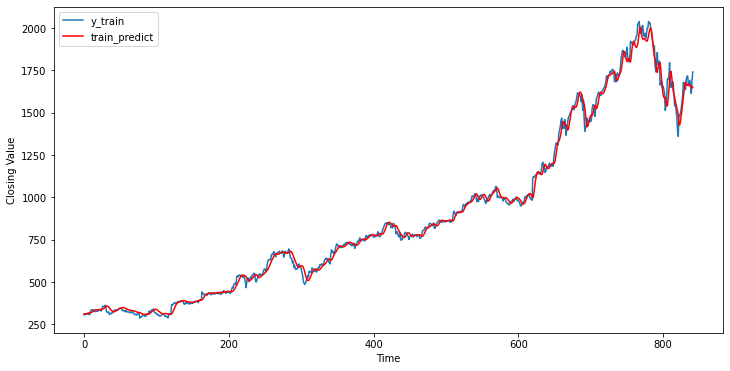

In [328]:
from google.colab import files

plt.figure(figsize=(12 , 6))

plt.plot(y_train , label='y_train')
plt.plot(train_predict , c='red' , label='train_predict')
plt.legend()
plt.savefig("trainprediction.png")

plt.xlabel("Time")
plt.ylabel("Closing Value")

files.download("trainprediction.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

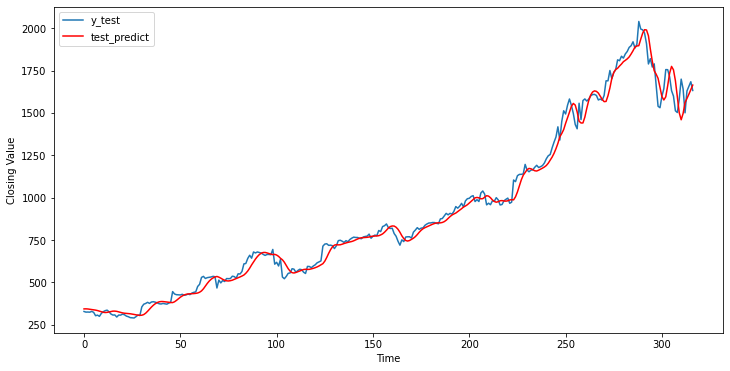

In [329]:
plt.figure(figsize=(12 , 6))

plt.plot(y_test , label='y_test')
plt.plot(test_predict , c='red' , label='test_predict')
plt.legend()
plt.savefig("testprediction.png")

plt.xlabel("Time")
plt.ylabel("Closing Value")

files.download("testprediction.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

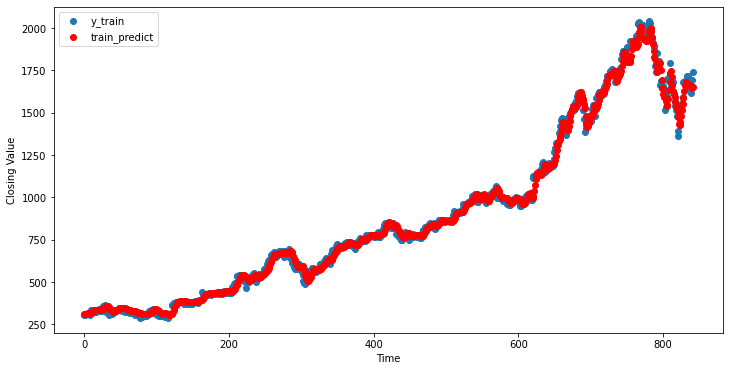

In [330]:
plt.figure(figsize=(12 , 6))

l = [i for i in range(y_train.shape[0])]
plt.scatter(l , y_train , label='y_train')
plt.scatter(l , train_predict , label='train_predict' , c='red')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Closing Value")

plt.plot()

plt.savefig("scattertrainpredict.png")
files.download("scattertrainpredict.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

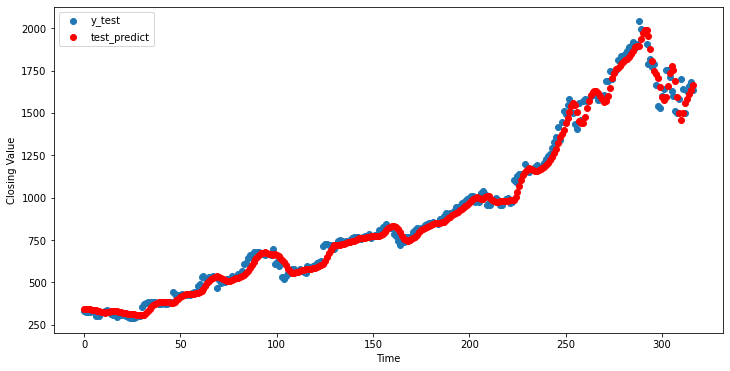

In [331]:
plt.figure(figsize=(12 , 6))

li = [i for i in range(y_test.shape[0])]
plt.scatter(li , y_test , label='y_test')
plt.scatter(li , test_predict , label='test_predict' , c='red')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Closing Value")

plt.plot()

plt.savefig("scattertestpredict.png")
files.download("scattertestpredict.png")

# **Predicting**

In [332]:
newpred = test[['Adj Close']]
newpred = np.reshape(newpred , (-1 , 1))
newpred = sc.fit_transform(newpred)
xnpred = []
for i in range(len(newpred) - 60 , len(newpred)):
  xnpred.append(newpred[i][0])

xnpred = np.reshape(xnpred , (1 , len(xnpred) , 1))
xnpred.shape
tpred = model.predict(xnpred)
tpred = sc.inverse_transform(tpred)
tpred.reshape(1)
print(tpred)

[[1668.9508]]


# **Saving & loading the model and predicting with the loaded model**

In [333]:
model.save("./lstmstockpredmodel")

INFO:tensorflow:Assets written to: ./lstmstockpredmodel/assets


INFO:tensorflow:Assets written to: ./lstmstockpredmodel/assets


In [334]:
from tensorflow import keras
pmodel = keras.models.load_model("./lstmstockpredmodel")
nxpred = pmodel.predict(xnpred)
nxpred = sc.inverse_transform(nxpred)
nxpred

array([[1668.9508]], dtype=float32)

In [335]:
newp = newdata[['Adj Close']]
newp = sc.fit_transform(newp)
newp = newp.flatten()

for i in range(100):
  xnewp = []
  for j in range(len(newp) - 60 , len(newp)):
      xnewp.append(newp[j])

  xnewp = np.reshape(xnewp , (1 , len(xnewp) , 1))
  tnp = pmodel.predict(xnewp)
  tnp.reshape(1)
  newp = np.append(newp , tnp[0][0])
  tnp = sc.inverse_transform(tnp)
  # tpred.reshape(1)
  print(tnp)
# print(newp)  
# newp.shape
# print(tnp[0][0])

[[1663.5166]]
[[1681.7498]]
[[1693.9847]]
[[1701.4879]]
[[1705.3043]]
[[1706.1593]]
[[1704.625]]
[[1701.2659]]
[[1696.6952]]
[[1691.5586]]
[[1686.4775]]
[[1681.979]]
[[1678.4417]]
[[1676.0657]]
[[1674.865]]
[[1674.6932]]
[[1675.2866]]
[[1676.3156]]
[[1677.4362]]
[[1678.3335]]
[[1678.7593]]
[[1678.5508]]
[[1677.6359]]
[[1676.0366]]
[[1673.8475]]
[[1671.2194]]
[[1668.3356]]
[[1665.3844]]
[[1662.5371]]
[[1659.9298]]
[[1657.652]]
[[1655.7433]]
[[1654.1932]]
[[1652.9517]]
[[1651.9418]]
[[1651.0723]]
[[1650.2545]]
[[1649.4054]]
[[1648.465]]
[[1647.3967]]
[[1646.1888]]
[[1644.8525]]
[[1643.4191]]
[[1641.931]]
[[1640.4364]]
[[1638.9824]]
[[1637.6111]]
[[1636.3523]]
[[1635.225]]
[[1634.2356]]
[[1633.3777]]
[[1632.6338]]
[[1631.983]]
[[1631.3994]]
[[1630.8596]]
[[1630.3423]]
[[1629.8309]]
[[1629.3153]]
[[1628.7913]]
[[1628.263]]
[[1627.7357]]
[[1627.2172]]
[[1626.7202]]
[[1626.2545]]
[[1625.8289]]
[[1625.4492]]
[[1625.119]]
[[1624.8379]]
[[1624.603]]
[[1624.41]]
[[1624.2516]]
[[1624.1206]]
[[162